# **6. Matriks Fundamental, Kestabilan Titik Ekuilibrium, Sistem Nonlinear**

> Gabriel Jonathan (gabejonathan29@gmail.com)

## **6.1 Matriks Fundamental**

Pandang suatu masalah nilai awal $\dfrac{d\textbf{x}}{dt}=A\textbf{x}$ dengan $\textbf{x}(0)=\textbf{x}_0$. Solusi umum dari persamaan diferensial tersebut dapat dituliskan menjadi suatu sistem matriks $\textbf{x}(t) = \Psi(t)\textbf{C}$, dengan $\textbf{C}$ vektor konstanta. 

**Matriks Fundamental** dari MNA tersebut adalah matriks $\Psi(t)$ yang kolom - kolomnya merupakan solusi - solusi bebas linear dari sistem tersebut.

Matriks $\Psi(t)$ disebut sebagai **matriks fundamental**. Konstanta $\textbf{C}$ dapat ditentukan dengan melakukan perhitungan $\textbf{C}=\Psi^{-1}(0)\textbf{x}(0)$. 

Diperoleh solusi khusus dari masalah nilai awal tersebut adalah 
\begin{equation*}
\textbf{x}(t) = \Psi(t)\Psi^{-1}(0)\textbf{x}(0)
\end{equation*}

Untuk sistem dengan gaya luar $\textbf{f}(t)$, solusi dari $\dfrac{d\textbf{x}}{dt}=A\textbf{x}+\textbf{f}(t)$ dengan $\textbf{x}(0)=\textbf{x}_0$ dapat diperoleh melalui metode variasi parameter, 
\begin{equation*}
\textbf{x}(t)  = \Psi(t)\Psi^{-1}(0)\textbf{x}(0) + \int_0^t \Psi^{-1}(s)\textbf{f}(s)\;ds
\end{equation*}

Matriks fundamental lainnya adalah matriks fundamental khusus $\exp(At)$ yang didefinisikan sebagai $\exp(At)=\Psi(t)\Psi^{-1}(0)$, yang sering digunakan untuk menyederhanakan penyajian dari solusi khusus persamaan diferensial. 


>   *Contoh 1* \
Pandang masalah nilai awal $\dfrac{d\textbf{x}}{dt}=A\textbf{x}$ dengan $A=\begin{bmatrix}-3 & 1 \\ 2 & -2\end{bmatrix}$ dan $\textbf{x}(0)=(1,0)^T$.

Untuk menentukan matriks fundamentalnya, tentukan nilai eigen dari $A$ terlebih dahulu.



In [ ]:
import numpy as np
A = np.array([[-3, 1], [2, -2]])
x0 = np.array([[1], [0]])

eigval_A , eigvec_A = np.linalg.eig(A)
print('Nilai eigen A : ', eigval_A)
print('Vektor eigen A : \n', eigvec_A)

Nilai eigen A :  [-4. -1.]
Vektor eigen A : 
 [[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]


Nilai eigen $A$ adalah $\lambda_1=-4$ dan $\lambda_2=-1$ dengan vektor eigen yang berkorespondensi yaitu $\textbf{v}_1 = (-0.70710678, 0.70710678)^T$ dan $\textbf{v}_2=(-0.4472136 , -0.89442719)^T$. 

Kita dapatkan solusi umum sistem tersebut yaitu 
\begin{equation*}
\textbf{x}(t) = C_1 e^{\lambda_1 t}\textbf{v}_1+C_2 e^{\lambda_2 t}\textbf{v}_2=
C_1 e^{-4t} \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix}
+ C_2 e^{-t} \begin{bmatrix}-0.4472136\\ -0.89442719\end{bmatrix}
\end{equation*}
sehingga didapatkan matriks fundamental
\begin{equation*}
\Psi(t)=
\begin{bmatrix}
-0.70710678 e^{-4t} & -0.4472136e^{-t}\\
 0.70710678e^{-4t} & -0.89442719e^{-t}
\end{bmatrix}
\end{equation*}


In [ ]:
from sympy import *

# Definisikan variabel simbolik
t, C1, C2 = symbols("t C1 C2")
x, y = symbols("x y", cls=Function, Function=True)

lambda_1 = eigval_A[0]
lambda_2 = eigval_A[1]
v1 = eigvec_A[:, [0]]
v2 = eigvec_A[:, [1]]
 

# Matriks fundamental
Psi = Matrix(np.concatenate((v1*exp(lambda_1*t), v2*exp(lambda_2*t)), axis=1))
print("Matriks Fundamental : \n")
Psi


Matriks Fundamental : 



Matrix([
[-0.707106781186547*exp(-4.0*t), -0.447213595499958*exp(-1.0*t)],
[ 0.707106781186547*exp(-4.0*t), -0.894427190999916*exp(-1.0*t)]])

Substitusi $t=0$ untuk memperoleh $\Psi(0)$, lalu tuliskan solusi khusus MNA tersebut yaitu $\textbf{x}(t) = \Psi(t) \Psi^{-1}(0)\textbf{x}(0)$. 

In [ ]:
Psi0 = Psi.subs(t, 0)                       # Substitusi t=0
Psi0 = np.array(Psi0).astype(np.float64)    # Convert Matrix object -> float64 np.array 
sol = np.matmul(Psi, np.matmul(np.linalg.inv(Psi0), x0))
sol_x = Eq(x(t), sol[0][0])
sol_y = Eq(y(t), sol[1][0])
print("Solusi Khusus : \n")
sol_x

Solusi Khusus : 



Eq(x(t), 0.333333333333333*exp(-t) + 0.666666666666667*exp(-4*t))

In [ ]:
sol_y

Eq(y(t), 0.666666666666667*exp(-t) - 0.666666666666667*exp(-4*t))

## **6.2 Kestabilan Titik Ekuilibrium**

### **6.2.1 Solusi Numerik PD menggunakan `odeint`**

Pada bagian ini, akan dibahas mengenai kestabilan dari suatu titik ekuilibrium pada SPD. 

Sebelum melangkah lebih jauh, kalian akan berkenalan dengan perintah `odeint` dari paket `scipy.integrate` untuk menentukan solusi suatu persamaan diferensial secara numerik.

Pada praktikum sebelumnya, Anda sudah mempelajari cara menggunakan perintah `dsolve` untuk menentukan solusi dari persamaan diferensial linier, homogen ataupun non-homogen. 

Pada Bagian ini, kita akan banyak menggambar bidang fasa, dengan bantuan `odeint`. Mengapa kita lebih memilih untuk menggunakan `odeint` dibandingkan `dsolve`?

1.   `dsolve` memberikan solusi SPD secara simbolik. Artinya, kita perlu mendefinisikan variabel - variabel simbolik seperti `t` atau `x`, `y`. Hasil keluaran yang diberikan tidak dapat langsung ditampilkan sebagai grafik.
2.    Perintah `dsolve` memberikan aproksimasi numerik menggunakan metode Runge-Kutta 4. Keluaran yang dihasilkan merupakan suatu `array`, sehingga dapat langsung ditampilkan pada grafik tanpa perlu modifikasi lebih lanjut. 



### **6.2.2 Analisis Bidang Fasa untuk SPD Linier**

Pandang suatu sistem persamaan diferensial $\dfrac{d\textbf{x}}{dt}=A\textbf{x}$ dengan $\textbf{x}(0)=\textbf{x}_0$. 
Perhatikan bahwa pada sistem PD linier, titik asal $(0,0)^T$ pasti merupakan satu-satunya titik ekuilibrium.

Untuk menentukan kestabilan dari suatu titik ekuilibrium, perhatikan nilai - nilai eigen dari matriks koefisien $A$. Misalkan untuk sistem 2-dimensi, matriks $A\in \mathbb{R}^2$ memiliki nilai eigen $\lambda_1$ dan $\lambda_2$. Berikut adalah klasifikasi yang mungkin dari bidang fasa serta kestabilannya:

\begin{array}{|c|c|c|}
\hline
\textbf{Kondisi Nilai Eigen $(\lambda_1, \lambda_2)$} & \textbf{Tipe}   & \textbf{Kestabilan} \\ \hline
\lambda_1> \lambda_2>0                              & \text{Node}            & \text{Tidak Stabil}        \\ \hline
\lambda_1<\lambda_2<0                               & \text{Node}            & \text{Stabil Asimtotik }   \\ \hline
\lambda_1<0<\lambda_2                               & \text{Saddle Point}    & \text{Tidak Stabil}        \\ \hline
\lambda_1=\lambda_2>0                               & \text{(Im)Proper Node} & \text{Tidak Stabil  }      \\ \hline
\lambda_1=\lambda_2<0                               & \text{(Im)Proper Node} & \text{Stabil Asimtotik }   \\ \hline
\lambda_1, \lambda_2=\alpha + i\beta , \alpha>0     & \text{Spiral Point}    & \text{Tidak Stabil }       \\ \hline
\lambda_1, \lambda_2=\alpha + i\beta , \alpha<0     & \text{Spiral Point }   & \text{Stabil Asimtotik }   \\ \hline
\lambda_1, \lambda_2=\pm i\beta                     & \text{Center }         & \text{Stabil   }           \\ \hline
\end{array}


Kita akan coba gambarkan bidang fasa dari sistem yang diberikan pada *Contoh 1* di atas.

Perhatikan bahwa nilai eigen dari matriks $A$ pada Contoh 1 keduanya bernilai negatif ($\lambda_1, \lambda_2<0$).
Berdasarkan tabel di atas, haruslah bidang fasa yang didapatkan berupa **node stabil**.

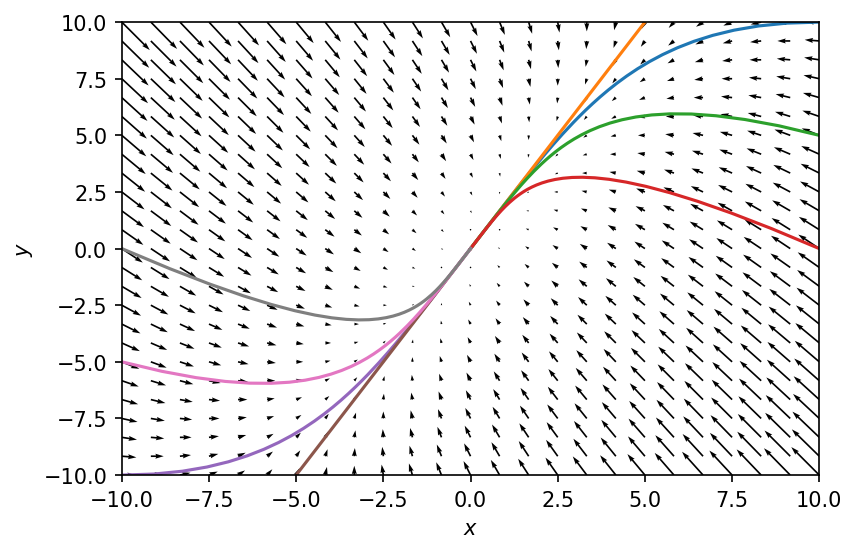

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['figure.dpi'] = 150

# Domain bidang fasa
x_s = np.linspace(-10, 10, 25) # partisi selang [-10, 10] menjadi 25 titik (24 subselang)
y_s = np.linspace(-10, 10, 25)

x_grid, y_grid = np.meshgrid(x_s, y_s)

plt.quiver(x_grid, y_grid, -3*x_grid+y_grid, 2*x_grid-2*y_grid) 
plt.xlabel('$x$')
plt.ylabel('$y$')

# Gambar trajektori solusi
def model(U, t):
    x, y = U
    dxdt = -3*x + y
    dydt =  2*x - 2*y
    return [dxdt, dydt]

inits = [[10, 10], [5, 10], [10, 5], [10, 0], [-10, -10], [-5, -10], [-10, -5], [-10, 0]]
for xy_i in inits:
    tspan = np.linspace(0, 10, 200)
    ys = odeint(model, xy_i, tspan)
    plt.plot(ys[:, 0], ys[:, 1])

plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()

## **6.3 Analisis Bidang Fasa untuk Sistem Non-Linear**


Salah satu model sistem non-linear yang paling sering dipelajari adalah model interaksi antara dua spesies. Akibat keberadaan suku nonlinear, umumnya titik ekuilibrium dari sistem berikut tidak hanya di titik asal $(0,0)$ saja.

Bentuk umum dari persamaan interaksi dua spesies adalah,
\begin{align*}
x' &= Ax + Bxy + Cx^2\\
y' &= Dy + Exy + Fy^2 
\end{align*}
dengan $A,B,C,D,E,F$ suatu konstanta dan $x(t), y(t)$ menyatakan jumlah populasi dari spesies 1 dan spesies 2 berturu - turut. 

> Contoh : Model interaksi mangsa-pemangsa (Lotka-Volterra) merupakan salah satu kasus khusus dari persamaan diatas, yang diberikan oleh
\begin{align*}
x' &= ax - bxy\\
y' &= dy + exy
\end{align*}

Jenis kestabilan dari semua titik kestabilan dapat ditentukan **secara lokal** dengan mengamati bidang fasa yang dibentuk.

> *Contoh 2* 
Pandang sistem 
\begin{align*}
\dfrac{dx}{dt} &=x - 0.5xy\\
\dfrac{dy}{dt} &=-3y+xy 
\end{align*}

Titik kesetimbangan dari sistem tersebut adalah $\{(0,0), (3,2), (3,0), (0,2)\}$ (Buktikan)


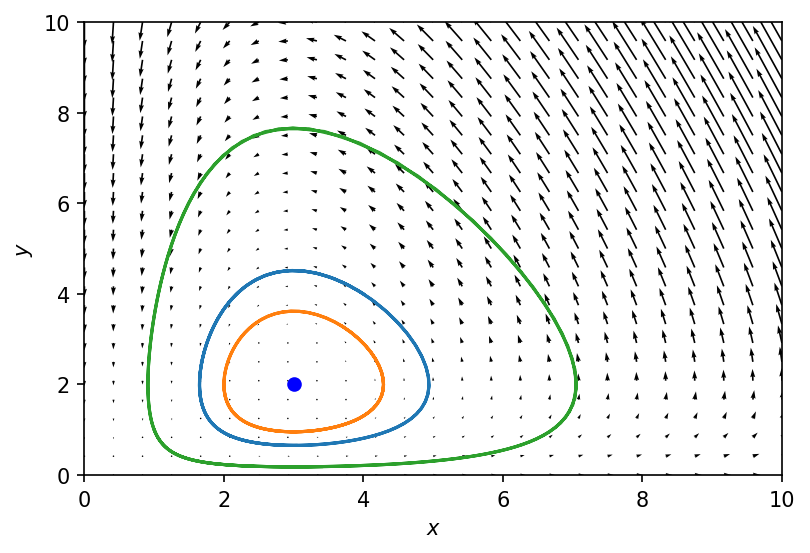

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['figure.dpi'] = 150

# Domain bidang fasa
x_s = np.linspace(0, 10, 25) # partisi selang [0, 10] menjadi 25 titik (24 subselang)
y_s = np.linspace(0, 10, 25)

x_grid, y_grid = np.meshgrid(x_s, y_s)
plt.quiver(x_grid, y_grid, x_grid - 0.5*x_grid*y_grid, -3*y_grid + x_grid*y_grid) 
plt.xlabel('$x$')
plt.ylabel('$y$')

# Gambar trajektori solusi
def model(U, t):
    x, y = U
    dxdt = x-0.5*x*y
    dydt =  -3*y+x*y
    return [dxdt, dydt]

inits = [[4, 4], [2, 2], [1, 1]]
for xy_i in inits:
    tspan = np.linspace(0, 10, 200)
    ys = odeint(model, xy_i, tspan)
    plt.plot(ys[:, 0], ys[:, 1])

plt.plot(3, 2, 'bo')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()